In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
T_end = 10

dt = 0.1
nt = int(T_end/dt)

t = np.arange(0, T_end+dt, dt)


In [4]:
Nparticules = 10000
sigma_init = 1.0
mu_init = 0.0
Initial_state = np.random.normal(loc=mu_init, scale=sigma_init, size=Nparticules)

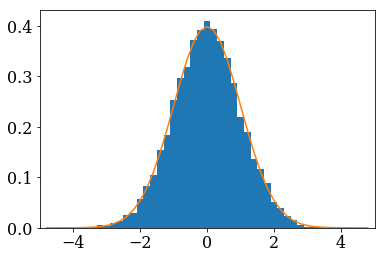

In [5]:
# Generate bins centered around 0
binwidth=0.2
bins=np.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# Plot the histogram and expected distribution
plt.xlim(-5,5)
plt.hist(Initial_state,bins,density=True);
plt.plot(bin_centers, np.exp(-(bin_centers-mu_init)**2/(2.0*sigma_init**2))/np.sqrt(2*np.pi*sigma_init**2))

In [6]:
alpha = 2.0

In [7]:
def final_state(T_final, dt, IS, alpha=2.0):
    FS = IS.copy()
    sqrt_2_alpha_dt = np.sqrt(2*alpha*dt)
    Npart = len(FS)
    np.random.seed(0)
    for i in range(int(T_final/dt)):
        FS = FS + sqrt_2_alpha_dt*np.random.normal(0,1,Npart)
    return FS

In [8]:
Evolving_states = np.empty([nt+1, Nparticules])
Evolving_states[0] = Initial_state

sqrt_2_alpha_dt = np.sqrt(2*alpha*dt)
np.random.seed(0)
'''
for i in range(nt):
    Evolving_states[i+1]=Evolving_states[i] \
        +sqrt_2_alpha_dt*np.random.normal(0,1,Nparticules)
'''    
Final_state = final_state(T_end, dt, Initial_state, alpha)


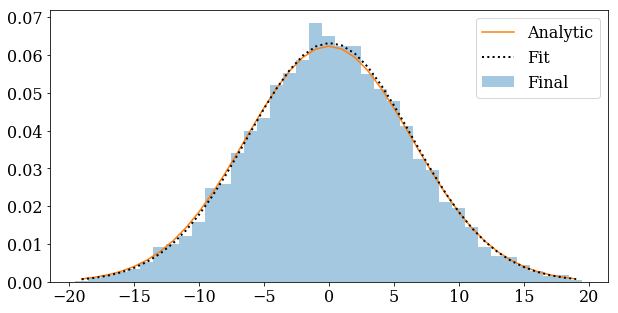

In [9]:
# Generate bins centered around 0
binwidth=1
bins=np.arange(-20,20,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
plt.figure(figsize=(10,5))

#plt.hist(Evolving_states[nt],bins,density=True, alpha=0.4, label='Evolved');
plt.hist(Final_state,bins,density=True, alpha=0.4, label='Final');
#plt.hist(Initial_state,bins,density=True, alpha=0.2, label='Initial');


# plot analytical solution
sigmat2=2*alpha*T_end+sigma_init**2
plt.plot(bin_centers, np.exp(-(bin_centers-mu_init)**2/(2.0*sigmat2))/np.sqrt(2*np.pi*sigmat2), label='Analytic')

mean_final,std_final=norm.fit(Final_state)
gauss_fit = norm.pdf(bin_centers, mean_final, std_final)
plt.plot(bin_centers, gauss_fit, 'k', ls=':', linewidth=2, label = 'Fit')

plt.legend()
plt.show()

In [10]:
data = np.histogram(Final_state,bins,density=True)
data_to_fit = data[0]

mean_final,std_final=norm.fit(Final_state)
mean_initial,std_initial=norm.fit(Initial_state)

print('Paramètres initiaux :', mu_init, sigma_init)
print('Paramètres fités:', mean_initial, std_initial)


print('Paramètres finaux :',mu_init, np.sqrt(sigmat2))
print('Paramètres fités:',mean_final, std_final)


Paramètres initiaux : 0.0 1.0
Paramètres fités: -0.007584689009809661 1.0007758566791227
Paramètres finaux : 0.0 6.4031242374328485
Paramètres fités: 0.08805185388982399 6.315216763805426


In [11]:
def sigma_of_alphas(alphas, T_final, dt, IS):
    Nresults = len(alphas)
    sigmas = np.zeros(Nresults)
    for i in range(Nresults):
        End_state = final_state(T_final, dt, IS, alpha=alphas[i])
        mean_final,std_final=norm.fit(End_state)
        sigmas[i] = std_final
        
    return sigmas

In [12]:
alphas = np.linspace(1., 6., 10)
T_end_alpha = 25.
dt_alpha = 0.05

sigmas_alpha = sigma_of_alphas(alphas, T_end_alpha, dt_alpha, Initial_state)


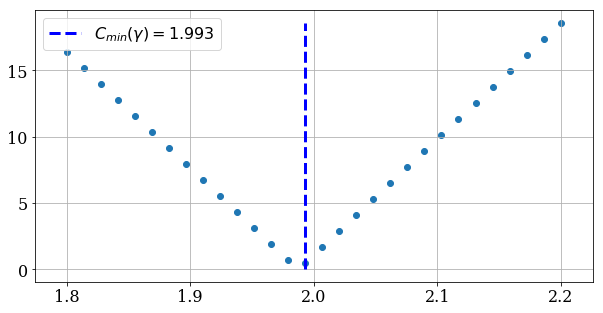

In [13]:
nb_C_alpha = 30
Cs_alpha = np.linspace(1.8, 2.2, nb_C_alpha)

errors_alpha = [np.average(np.abs(sigmas_alpha**2 - (C *alphas*T_end_alpha+sigma_init**2))) for C in Cs_alpha]

C_min_alpha = Cs_alpha[np.where(errors_alpha == min(errors_alpha))]

plt.figure(figsize=(10,5))

plt.scatter(Cs_alpha, errors_alpha)
plt.plot([C_min_alpha, C_min_alpha], [0, max(errors_alpha)], ls='--', c='blue', lw = 3, label=r'$C_{min}(\gamma) = %.3f$' %C_min_alpha)

#plt.xlabel(r'$dt$ [T]')
#plt.ylabel(r'$\sigma^2$ [L$^2$]')
plt.legend()
#plt.xlim([min(Cs), max(Cs)])
#plt.ylim([0, max(errors_gamma)])
plt.grid()
plt.show()

# Ajout des frictions

$$dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}$$

In [144]:
np.random.seed(0)

T_end = 4.0
dt = 0.01
n_steps = int(T_end/dt)

Nparticules = 50000
sigma_init = 1.0
mu_init = 0.0
Initial_friction = np.random.normal(loc=mu_init, scale=sigma_init, size=Nparticules)
Initial_friction_2 = np.random.normal(loc=mu_init, scale=2.5, size=Nparticules)
Initial_friction_3 = np.random.normal(loc=mu_init, scale=0, size=Nparticules)


alpha = 2.0
gamma = 4.0

In [151]:
def final_state_friction(T_final, dt, IS, alpha=2.0, gamma = 2.0):
    FS = IS.copy()
    sqrt_2_alpha_dt = np.sqrt(2*alpha*dt)
    Npart = len(FS)
    
    sqrt_2_alpha_dt = np.sqrt(2*alpha*dt)
    gamma_dt = gamma*dt
    
    #np.random.seed(0)
    for i in range(int(T_final/dt)):
        PrecS = FS.copy()
        FS = PrecS -gamma_dt*PrecS + sqrt_2_alpha_dt*np.random.normal(0,1,Npart)
        
    return FS

In [152]:
Friction_states = np.empty([n_steps+1, Nparticules])
Friction_states[0] = Initial_friction

Final_friction = final_state_friction(T_end, dt, Initial_friction, alpha=alpha, gamma=gamma)
Final_friction_2 = final_state_friction(T_end, dt, Initial_friction_2, alpha=alpha, gamma=gamma)
Final_friction_3 = final_state_friction(T_end, dt, Initial_friction_3, alpha=alpha, gamma=gamma)

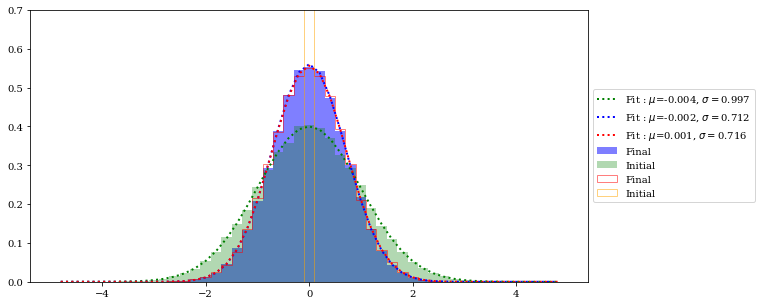

In [153]:
# Generate bins centered around 0
binwidth=0.2
bins=np.arange(-5,5,binwidth)
bins = bins + binwidth/2

# Compute bin centers
bin_centers = bins[:-1]+binwidth/2

# plot a histrogram for verification
plt.figure(figsize=(10,5))

# Première condition initiale

#plt.hist(Friction_states[-1],bins,density=True, alpha=0.6, label='Evolved');
plt.hist(Final_friction,bins,density=True, alpha=0.5, label='Final', color='blue');
plt.hist(Initial_friction,bins,density=True, alpha=0.3, label='Initial', color='green');
#plt.hist(Initial_friction,bins,density=True, alpha=0.4, label='Initial');

mean_initial,std_initial=norm.fit(Initial_friction)
gauss_fit_initial = norm.pdf(bin_centers, mean_initial, std_initial)
plt.plot(bin_centers, gauss_fit_initial, 'k', ls=':', linewidth=2, c='green'
         , label = 'Fit : $\mu$=%.3f, $\sigma=$%.3f' %(mean_initial, std_initial))

mean_final,std_final=norm.fit(Final_friction)
gauss_fit_final = norm.pdf(bin_centers, mean_final, std_final)
plt.plot(bin_centers, gauss_fit_final, 'k', ls=':', linewidth=2, c='blue'
         , label = 'Fit : $\mu$=%.3f, $\sigma=$%.3f' %(mean_final, std_final))

'''
# Seconde condition initiale

plt.hist(Final_friction_2,bins,density=True, alpha=0.5, histtype='step', label='Final', color='red');
plt.hist(Initial_friction_2,bins,density=True, alpha=0.5, histtype='step', label='Initial', color='orange');

mean_initial_2,std_initial_2=norm.fit(Initial_friction_2)
gauss_fit_initial_2 = norm.pdf(bin_centers, mean_initial_2, std_initial_2)
plt.plot(bin_centers, gauss_fit_initial_2, 'k', ls=':', linewidth=2, c='orange'
         , label = 'Fit : $\mu$=%.3f, $\sigma=$%.3f' %(mean_initial_2, std_initial_2))

mean_final_2,std_final_2=norm.fit(Final_friction_2)
gauss_fit_final_2 = norm.pdf(bin_centers, mean_final_2, std_final_2)
plt.plot(bin_centers, gauss_fit_final_2, 'k', ls=':', linewidth=2, c='red'
         , label = 'Fit : $\mu$=%.3f, $\sigma=$%.3f' %(mean_final_2, std_final_2))
'''

# Troisième condition initiale

plt.hist(Final_friction_3,bins,density=True, alpha=0.5, histtype='step', label='Final', color='red');
plt.hist(Initial_friction_3,bins,density=True, alpha=0.5, histtype='step', label='Initial', color='orange');

mean_initial_3,std_initial_3=norm.fit(Initial_friction_3)


mean_final_3,std_final_3=norm.fit(Final_friction_3)
gauss_fit_final_3 = norm.pdf(bin_centers, mean_final_3, std_final_3)
plt.plot(bin_centers, gauss_fit_final_3, 'k', ls=':', linewidth=2, c='red'
         , label = 'Fit : $\mu$=%.3f, $\sigma=$%.3f' %(mean_final_3, std_final_3))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,0.7)
plt.show()

We now try to investigate the effect of $\gamma$ on the standard deviation of the density distribution at the equilibrium. 

First we have to determine when the system reaches an equilibrium. This will be done by plotting the standard deviation as a function of the time $t$. The equilibrium will be reached when it will enter a regime where it only oscillates (due to statistical noise) around one value.

In [65]:
def sigma_of_t(T_final, dt, IS, alpha=2.0, gamma=2.0):
    Nresults = int(T_final/dt)
    sigmas = np.zeros(Nresults+1)
    
    Friction_states = np.empty([Nresults+1, Nparticules])
    Friction_states[0] = IS.copy()
    mu_of_t , std_of_t=norm.fit(Friction_states[0])
    sigmas[0] = std_of_t
    
    sqrt_2_alpha_dt = np.sqrt(2*alpha*dt)
    gamma_dt = gamma*dt
    print(sqrt_2_alpha_dt, gamma_dt)
    for i in range(Nresults):
        Friction_states[i+1]= Friction_states[i] \
            - gamma_dt*Friction_states[i] \
            +sqrt_2_alpha_dt*np.random.normal(0,1,Nparticules)
        mu_of_t , std_of_t=norm.fit(Friction_states[i+1])
        sigmas[i+1] = std_of_t
        
    return sigmas

In [111]:
T_for_equilibrium = 7.0
dt_for_equilibrium = 0.01

times = np.arange(0, T_for_equilibrium+dt_for_equilibrium, dt_for_equilibrium)

gamma_t8 = 8.0
sigmas_t8 = sigma_of_t(T_for_equilibrium, dt_for_equilibrium, Initial_friction, alpha=2.0, gamma=gamma_t8)
gamma_t4 = 4.0
sigmas_t4 = sigma_of_t(T_for_equilibrium, dt_for_equilibrium, Initial_friction, alpha=2.0, gamma=gamma_t4)
gamma_t2 = 2.0
sigmas_t2 = sigma_of_t(T_for_equilibrium, dt_for_equilibrium, Initial_friction, alpha=2.0, gamma=gamma_t2)
gamma_t15 = 1.5
sigmas_t15 = sigma_of_t(T_for_equilibrium, dt_for_equilibrium, Initial_friction, alpha=2.0, gamma=gamma_t15)
gamma_t1 = 1.0
sigmas_t1 = sigma_of_t(T_for_equilibrium, dt_for_equilibrium, Initial_friction, alpha=2.0, gamma=gamma_t1)
gamma_t075 = 0.75
sigmas_t075 = sigma_of_t(T_for_equilibrium, dt_for_equilibrium, Initial_friction, alpha=2.0, gamma=gamma_t075)
gamma_t05 = 0.5
sigmas_t05 = sigma_of_t(T_for_equilibrium, dt_for_equilibrium, Initial_friction, alpha=2.0, gamma=gamma_t05)

0.2 0.08
0.2 0.04
0.2 0.02
0.2 0.015
0.2 0.01
0.2 0.0075
0.2 0.005


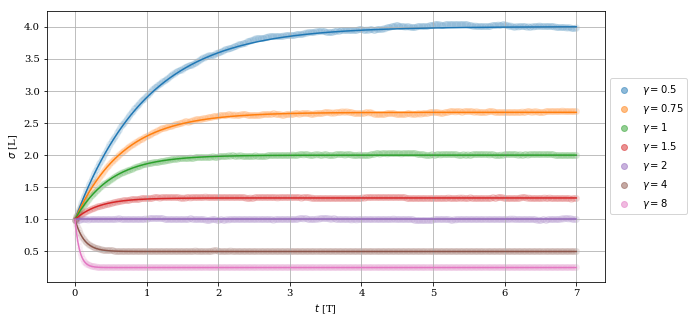

In [118]:
sigmas_t05 = np.load('sigmasT_05_7.npy')
sigmas_t075 = np.load('sigmasT_075_7.npy')
sigmas_t1 = np.load('sigmasT_1_7.npy')
sigmas_t15 = np.load('sigmasT_15_7.npy')
sigmas_t2 = np.load('sigmasT_2_7.npy')
sigmas_t4 = np.load('sigmasT_4_7.npy')
sigmas_t8 = np.load('sigmasT_8_7.npy')
gammas_t = np.load('gammas_x7.npy')
times = np.load('times_0to7.npy')


plt.figure(figsize=(10,5))

#sigma2_t_predic = 2*alpha*dt+alpha/gamma_t#-2*alpha*dt/np.pi


sigma_eq_test = alpha/gammas_t + 0.6*alpha*dt_for_equilibrium

plt.scatter(times, sigmas_t05**2, alpha=0.05, label=r'$\gamma=%g$' %gamma_t05)

plt.scatter(times, sigmas_t075**2, alpha=0.05, label=r'$\gamma=%g$' %gamma_t075)

plt.scatter(times, sigmas_t1**2, alpha=0.05, label=r'$\gamma=%g$' %gamma_t1)

plt.scatter(times, sigmas_t15**2, alpha=0.05, label=r'$\gamma=%g$' %gamma_t15)

plt.scatter(times, sigmas_t2**2, alpha=0.05, label=r'$\gamma=%g$' %gamma_t2)

plt.scatter(times, sigmas_t4**2, alpha=0.05, label=r'$\gamma=%g$' %gamma_t4)

plt.scatter(times, sigmas_t8**2, alpha=0.05, label=r'$\gamma=%g$' %gamma_t8)


for i in range(len(gammas_t)):
    plt.plot(times,
            sigma_init*np.exp(-2*times*gammas_t[i])+(alpha/gammas_t[i])*(1-np.exp(-2*times*gammas_t[i])))
    #plt.plot([0, 7.5], [sigma_eq_test[i], sigma_eq_test[i]])


#plt.plot([0, T_for_equilibrium], [sigma2_t_predic, sigma2_t_predic], ls='--', c='k', label = r'$(\sigma_{predic}^{eq})^2$')

plt.plot()
plt.xlabel(r'$t$ [T]')
plt.ylabel(r'$\sigma$ [L]')
leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)
plt.grid()
plt.show()

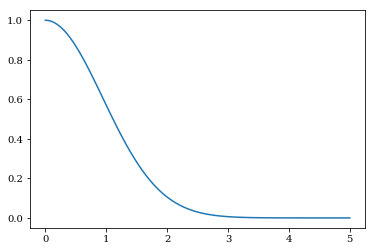

In [24]:
# T_end = 7.0 | dt = 0.01 | gamma = 4.0 | sigma_i = 1.

plt.figure()

test = np.linspace(0,5,100)

plt.plot(test, np.exp(-test**2*0.75**2))
plt.show()


In [193]:
sigma_eq_05_test = 0.6*alpha*dt_for_equilibrium+alpha/gamma_t05

print(sigmas_t05[-1]**2)
print(sigma_eq_05_test)

4.012644568887964
4.012


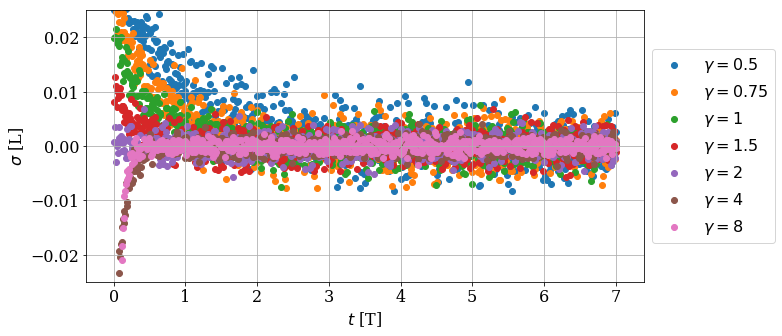

In [179]:
plt.figure(figsize=(10,5))


plt.scatter(times[1:], np.diff(sigmas_t05**2), label=r'$\gamma=%g$' %gamma_t05)

plt.scatter(times[1:], np.diff(sigmas_t075**2), label=r'$\gamma=%g$' %gamma_t075)

plt.scatter(times[1:], np.diff(sigmas_t1**2), label=r'$\gamma=%g$' %gamma_t1)

plt.scatter(times[1:], np.diff(sigmas_t15**2), label=r'$\gamma=%g$' %gamma_t15)

plt.scatter(times[1:], np.diff(sigmas_t2**2), label=r'$\gamma=%g$' %gamma_t2)

plt.scatter(times[1:], np.diff(sigmas_t4**2), label=r'$\gamma=%g$' %gamma_t4)

plt.scatter(times[1:], np.diff(sigmas_t8**2), label=r'$\gamma=%g$' %gamma_t8)



plt.ylim(-0.025,0.025)
plt.xlabel(r'$t$ [T]')
plt.ylabel(r'$\sigma$ [L]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

The two previous plot clearly show that, with these parameters of simulation ($dt=0.01,\ \alpha=2.0,\ N_{part}=50000,\ \mu_{init}=0.0,\ \sigma_{init}=1.0$), the equilibrium is reached at $t=4.0$, especially for $\gamma \geq 1$. As the following investigation will be mainly focused on $\gamma$ values greater than $1$, the final simulation time can be set to $T_{end} = 5.0$ to study the equilibrium.

In [119]:
T_end = 7.0
dt = 0.01
gamma = 4.0

Now let's study the influence of the $\gamma$ friction factor on the standard deviation at the equilibrium. To do so we begin by plotting the value of the squared standard deviation found by fitting the final data to a gaussian distribution as a function of $\gamma$.

In [120]:
def sigma_of_gamma(gammas, T_final, dt, IS, alpha=2.0):
    Nresults = len(gammas)
    sigmas = np.zeros(Nresults)
    for i in range(Nresults):
        End_state = final_state_friction(T_final, dt, IS, alpha, gamma = gammas[i])
        mean_final,std_final=norm.fit(End_state)
        sigmas[i] = std_final
        
    return sigmas

In [121]:
gammas = np.linspace(1.0, 30.0, 50)

sigmas_gamma = sigma_of_gamma(gammas, T_end, dt, Initial_friction, alpha)

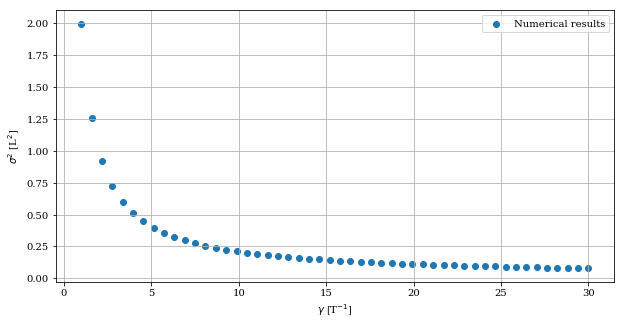

In [124]:
plt.figure(figsize=(10,5))

plt.scatter(gammas, sigmas_gamma**2, label='Numerical results')

#plt.plot(gammas, 2*alpha*dt+alpha/(gammas), label=r'$y=2\alpha dt+\alpha/\gamma$')
#plt.plot(gammas, 2*alpha*dt/np.pi+alpha/(gammas), label=r'$y=\frac{2}{\pi}\alpha dt+\alpha/\gamma$')
#plt.plot(gammas, sigma_init*np.exp(-T_end*gammas)+alpha/(gammas), label=r'$y=\sigma_i^2e^{T_{end}\gamma}+\alpha/\gamma$')

#plt.plot([1, max(gammas)+len(gammas)/20], [2*alpha*dt, 2*alpha*dt], ls='--', c='k')

#plt.plot([1, 102], [2*alpha*dt, 2*alpha*dt], ls='--', c='k')
#plt.scatter(100, sigma_of_gamma([100], T_end, dt, Initial_friction, alpha) )

plt.xlabel(r'$\gamma$ [T$^{-1}$]')
plt.legend()
plt.ylabel(r'$\sigma^2$ [L$^2$]')
plt.grid()
plt.show()

In [125]:
p = np.polyfit(gammas**(-1), sigmas_gamma**2, 1)
print(p[0], p[1])
print(np.exp(-2*gamma*T_end))

1.9845688613223171 0.011513167730407059
4.780892883885469e-25


--> problème du modèle quand gamma tend vers 0 ? Non: complètement applati à l'équilibre

Let's try to find the formula for the standard deviation at the equilibrium by analyzing the difference between the value fitted and some models.

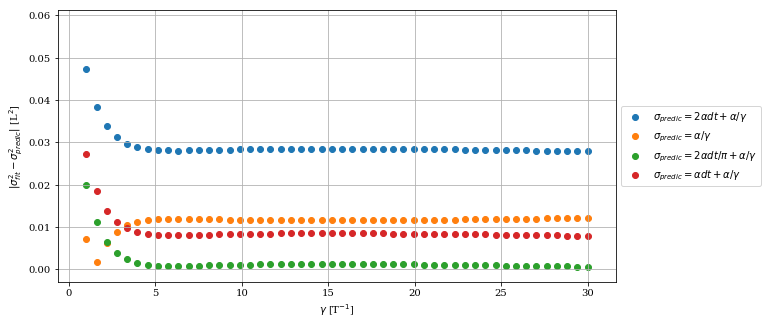

In [81]:
plt.figure(figsize=(10,5))

sigma2_predic1 = 2*alpha*dt+alpha/(gammas)
sigma2_predic2 = alpha/(gammas)
sigma2_predic3 = 2*alpha*dt+alpha/(gammas)+sigma_init**2
sigma2_predic4 = 2*alpha*dt/np.pi+alpha/(gammas)
sigma2_predic5 = 1*alpha*dt+alpha/(gammas)
sigma2_predic6 = sigma_init*np.exp(-2*T_end*gammas)+(alpha/gammas)*(1-np.exp(-2*T_end*gammas))

plt.scatter(gammas, np.abs(sigmas_gamma**2-sigma2_predic1)
            , label=r'$\sigma_{predic}=2\alpha dt+\alpha/\gamma$')

plt.scatter(gammas, np.abs(sigmas_gamma**2-sigma2_predic2)
            , label=r'$\sigma_{predic}=\alpha/\gamma$')

#plt.scatter(gammas, np.abs(sigmas_gamma**2-sigma2_predic3), label=r'$2\alpha dt+\frac{\alpha}{\gamma}+\sigma_{init}^2$')

plt.scatter(gammas, np.abs(sigmas_gamma**2-sigma2_predic4)
            , label=r'$\sigma_{predic}=2\alpha dt/\pi+\alpha/\gamma$')

plt.scatter(gammas, np.abs(sigmas_gamma**2-sigma2_predic5)
            , label=r'$\sigma_{predic}=\alpha dt + \alpha/\gamma$')

#plt.scatter(gammas, np.abs(sigmas_gamma**2-sigma2_predic6), label=r'$\sigma_{predic}=\sigma_i^2e^{T_{end}\gamma}+\alpha/\gamma$')


plt.xlabel(r'$\gamma$ [T$^{-1}$]')
plt.ylabel(r'$|\sigma_{fit}^2-\sigma_{predic}^2|$ [L$^2$]')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.show()

Minimisation de l'erreur pour un écart type de la forme $\sigma_{predic}^2=C\alpha dt+\alpha/\gamma$, en se basant sur l'erreur moyenne sur l'ensemble des gammas.

En effet: dimension $[\sigma^2]=L^2 \Rightarrow [2\alpha dt]=L^2 \Rightarrow [\alpha dt]=L^2 \Rightarrow [\alpha] = L^2/[dt] \Rightarrow [\alpha]=L^2/T$.

De même: $[dx]=[-\gamma x dt] \Rightarrow [\gamma x dt] = L \Rightarrow [\gamma] = L/([x][dt]) \Rightarrow [\gamma] = L/(LT) \Rightarrow [\gamma] = 1/T$.

On a alors $[\alpha/\gamma]=(L^2/T)/(1/T)=L^2$.

Et $[\alpha dt] = (L^2/T)\cdot T = L^2$.

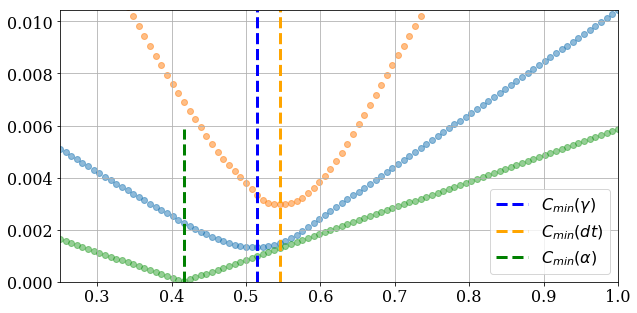

C_{min}(gamma) =  [0.51515152]  | 2/pi =  0.6366197723675814
C_{min}(dt) =  [0.54545455]  | 2/pi =  0.6366197723675814
C_{min}(alpha) =  [0.41666667]  | 2/pi =  0.6366197723675814


In [138]:
nb_C = 100
Cs = np.linspace(0.25, 1., nb_C)
errors = np.zeros(nb_C)

errors_gamma = [np.average(np.abs(sigmas_gamma**2 - (C *alpha*dt+alpha/gammas))) for C in Cs]
errors_dt = [np.average(np.abs(sigmas_dt**2 - (C *alpha*dts+alpha/gamma))) for C in Cs]
#errors_alpha = [np.average(np.abs(sigmas_alpha_friction**2 - (C *alphas_friction*dt+alphas_friction/gamma))) for C in Cs]

errors_alpha = [np.average(np.abs(sigmas_alpha_friction**2/alphas_friction - (C*dt+1/gamma))) for C in Cs]


C_min_gamma = Cs[np.where(errors_gamma == min(errors_gamma))]
C_min_dt = Cs[np.where(errors_dt == min(errors_dt))]
C_min_alpha = Cs[np.where(errors_alpha == min(errors_alpha))]


plt.figure(figsize=(10,5))

plt.scatter(Cs, errors_gamma, alpha = 0.5)
plt.plot([C_min_gamma, C_min_gamma], [min(errors_gamma)-0.005, max(errors_gamma)]
         , ls='--', c='blue', lw = 3
         , label=r'$C_{min}(\gamma)$')

#plt.plot([2/np.pi, 2/np.pi], [min(errors_gamma)-0.005, max(errors_gamma)], ls=':', c='r', lw = 3, label=r'$2/\pi$')


plt.scatter(Cs, errors_dt, alpha = 0.5)
plt.plot([C_min_dt, C_min_dt], [min(errors_dt)-0.005, max(errors_dt)]
         , ls='--', c='orange', lw = 3
         , label=r'$C_{min}(dt)$')


plt.scatter(Cs, errors_alpha, alpha = 0.5)
plt.plot([C_min_alpha, C_min_alpha], [min(errors_alpha)-0.005, max(errors_alpha)]
         , ls='--', c='green', lw = 3
         , label=r'$C_{min}(\alpha)$')



#plt.xlabel(r'$dt$ [T]')
#plt.ylabel(r'$\sigma^2$ [L$^2$]')
plt.legend()
plt.xlim([min(Cs), max(Cs)])
plt.ylim([0, max(errors_gamma)])
plt.grid()
plt.show()

print('C_{min}(gamma) = ', C_min_gamma, ' | 2/pi = ', 2/np.pi)
print('C_{min}(dt) = ', C_min_dt, ' | 2/pi = ', 2/np.pi)
print('C_{min}(alpha) = ', C_min_alpha, ' | 2/pi = ', 2/np.pi)


pas de dépendance en $\sigma_{init}$ --> OK. (équilibre)

pas de dépendacne en dt ? --> Faire plot $\sigma(dt)$

(array([24]), array([90]))
4.1686454403018953e-07 0.00027475350225335704 0.0029200532295196794
[0.67272727] [0.98969697]


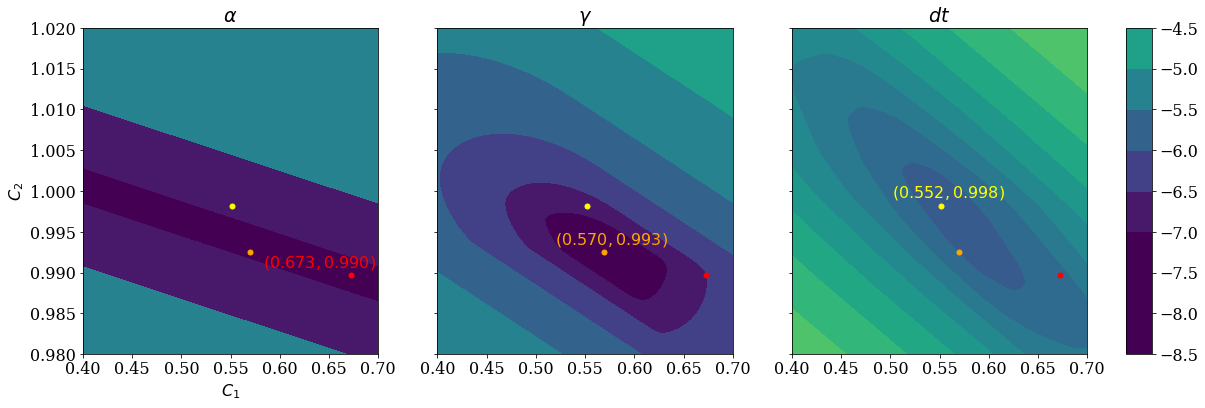

In [174]:
C1s = np.linspace(0.4, 0.7, nb_C)
C2s = np.linspace(0.98, 1.02, nb_C)

errors_gamma_2D = [[np.average(np.abs(sigmas_gamma**2 - (C1 *alpha*dt+C2*alpha/gammas))) for C1 in C1s] for C2 in C2s]
errors_dt_2D = [[np.average(np.abs(sigmas_dt**2 - (C1 *alpha*dts+C2*alpha/gamma))) for C1 in C1s] for C2 in C2s]
errors_alpha_2D = [[np.average(np.abs(sigmas_alpha_friction**2/alphas_friction - (C1*dt+C2/gamma))) for C1 in C1s] for C2 in C2s]



X, Y = np.meshgrid(C1s, C2s)
Z = errors_alpha_2D

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(18,6))
#fig = plt.figure(figsize=(6,5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
#ax = fig.add_axes([left, bottom, width, height]) 

cmap_used_here = 'viridis'

cp1 = ax1.contourf(X, Y, np.log(errors_alpha_2D)
                   , cmap=cmap_used_here, vmin=-7, vmax=-3
                  )

cp2 = ax2.contourf(X, Y, np.log(errors_gamma_2D)
                   , cmap=cmap_used_here, vmin=-7, vmax=-3
                  )

cp3 = ax3.contourf(X, Y, np.log(errors_dt_2D)
                  , cmap=cmap_used_here, vmin=-7, vmax=-3
                  )

cbar_ax = fig.add_axes([0.93, 0.125, 0.02, 0.755])
fig.colorbar(cp2, cax = cbar_ax)


mins_alpha = np.where(errors_alpha_2D == np.min(errors_alpha_2D))
mins_gamma = np.where(errors_gamma_2D == np.min(errors_gamma_2D))
mins_dt = np.where(errors_dt_2D == np.min(errors_dt_2D))
print(mins_alpha)
for ax in (ax1, ax2, ax3):
    ax.scatter(C1s[mins_alpha[1]],C2s[mins_alpha[0]], c='red', s=25, marker='o'
               , label=r'$\alpha\ (%.3f, %.3f)$' %(C1s[mins_alpha[1]], C2s[mins_alpha[0]])
              )
    ax.scatter(C1s[mins_gamma[1]],C2s[mins_gamma[0]], c='orange', s=25, marker='o'
               , label=r'$\gamma\ (%.3f, %.3f)$' %(C1s[mins_gamma[1]], C2s[mins_gamma[0]])
              )
    ax.scatter(C1s[mins_dt[1]],C2s[mins_dt[0]], c='yellow', s=25, marker='o'
               , label=r'$dt\ (%.3f, %.3f)$' %(C1s[mins_dt[1]], C2s[mins_dt[0]])
              )
    
ax1.annotate('$(%.3f, %.3f)$' %(C1s[mins_alpha[1]], C2s[mins_alpha[0]]), color='red'
             ,xy=(C1s[mins_alpha[1]]-0.09,C2s[mins_alpha[0]]+0.001))
ax2.annotate('$(%.3f, %.3f)$' %(C1s[mins_gamma[1]], C2s[mins_gamma[0]]), color='orange'
             ,xy=(C1s[mins_gamma[1]]-0.05,C2s[mins_gamma[0]]+0.001))
ax3.annotate('$(%.3f, %.3f)$' %(C1s[mins_dt[1]], C2s[mins_dt[0]]), color='yellow'
             ,xy=(C1s[mins_dt[1]]-0.05,C2s[mins_dt[0]]+0.001))

ax1.set_title(r'$\alpha$')
ax2.set_title(r'$\gamma$')
ax3.set_title(r'$dt$')

ax1.set_xlabel(r'$C_1$')
ax1.set_ylabel(r'$C_2$')
#ax1.legend(loc='center left', bbox_to_anchor=(-1., 0.5))
fig.show()


print(np.min(errors_alpha_2D), np.min(errors_gamma_2D), np.min(errors_dt_2D))

print(C1s[mins[1]], C2s[mins[0]])

In [82]:
def sigma_of_dt(dts, T_final, IS, alpha=2.0, gamma = 2.0):
    Nresults = len(dts)
    sigmas = np.zeros(Nresults)
    for i in range(Nresults):
        End_state = final_state_friction(T_final, dts[i], IS, alpha, gamma)
        mean_final,std_final=norm.fit(End_state)
        sigmas[i] = std_final
        
    return sigmas

In [83]:
dts = np.linspace(0.001, 0.05, 30)

sigmas_dt = sigma_of_dt(dts, T_end, Initial_friction, alpha, gamma)

No handles with labels found to put in legend.


7.0 2.0 4.0


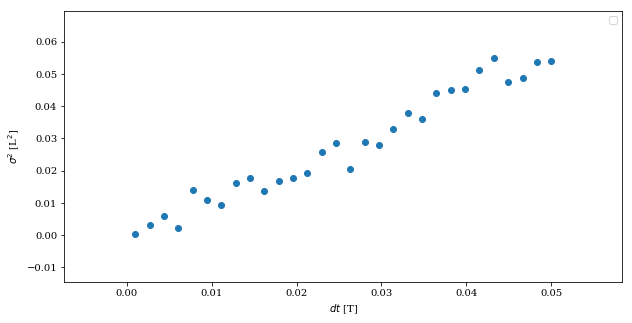

In [137]:
plt.figure(figsize=(10,5))

plt.scatter(dts, np.abs(sigmas_dt**2-alpha/gamma))
#plt.scatter(0, alpha/gamma)
#plt.plot(dts, 0.5*alpha*dts+alpha/gamma, label=r'$\frac{2\alpha}{\pi} dt+\alpha/\gamma$')
plt.xlabel(r'$dt$ [T]')
plt.ylabel(r'$\sigma^2$ [L$^2$]')
plt.legend()
plt.show()

In [127]:
def sigma_of_alphas_friction(alphas, T_final, dt, IS, gamma=2.0):
    Nresults = len(alphas)
    sigmas = np.zeros(Nresults)
    for i in range(Nresults):
        End_state = final_state_friction(T_final, dt, IS, alpha=alphas[i], gamma = gamma)
        mean_final,std_final=norm.fit(End_state)
        sigmas[i] = std_final
        
    return sigmas

In [128]:
alphas_friction = np.linspace(1.5, 6., 30)
T_end_alpha_friction = 30.

sigmas_alpha_friction = sigma_of_alphas_friction(alphas_friction, T_end, dt, Initial_friction, gamma)

4.0


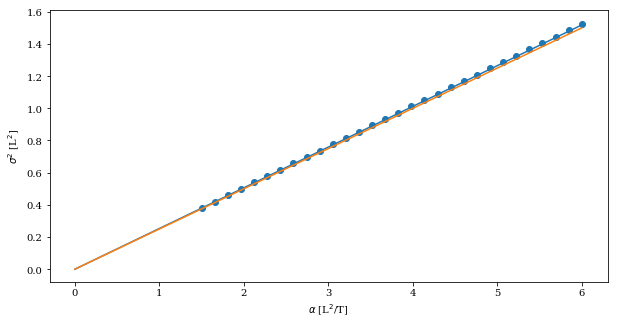

In [132]:
plt.figure(figsize=(10,5))

alpha_line = np.array([0, 6.])

plt.scatter(alphas_friction, sigmas_alpha_friction**2)
plt.plot(alpha_line, 0.3*alpha_line*dt+alpha_line/gamma)#, label=r'$\frac{2\alpha}{\gamma} dt$')
plt.plot(alpha_line, sigma_init*np.exp(-2*T_end_alpha_friction*gamma)+(alpha_line/gamma)*(1-np.exp(-2*T_end_alpha_friction*gamma)))
plt.xlabel(r'$\alpha$ [L$^2$/T]')
plt.ylabel(r'$\sigma^2$ [L$^2$]')
#plt.legend()
plt.show()


Let us do a convergence study by varying the time step $dt$.

In [139]:
def sigma_of_dt_conv(dts, T_final, IS, alpha=2.0, gamma = 2.0, nb_to_av=10):
    Nresults = len(dts)
    sigmas = np.zeros(Nresults)
    
    for i in range(Nresults):
        sigmas_to_av = np.zeros(int(nb_to_av))
        for j in range(int(nb_to_av)):
            End_state = final_state_friction(T_final, dts[i], IS, alpha, gamma)
            mean_final,std_final=norm.fit(End_state)
            sigmas_to_av[j] = std_final
            
        sigmas[i] = np.average(sigmas_to_av)
        
    return sigmas

In [141]:
dts_conv = np.linspace(0.001, 0.05, 30)

sigmas_dt_conv = sigma_of_dt_conv(dts_conv, 4., Initial_friction, 2., 4., 10)

No handles with labels found to put in legend.


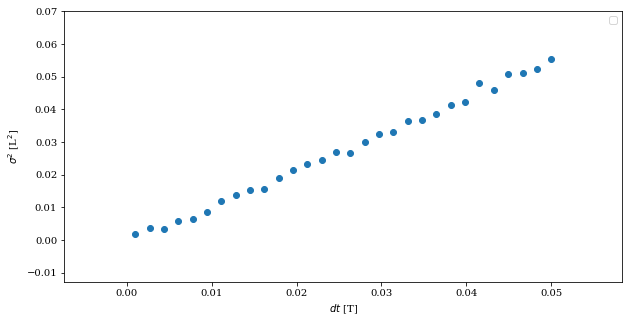

In [142]:
plt.figure(figsize=(10,5))

plt.scatter(dts_conv, np.abs(sigmas_dt_conv**2-alpha/gamma))
#plt.scatter(0, alpha/gamma)
#plt.plot(dts, 0.5*alpha*dts+alpha/gamma, label=r'$\frac{2\alpha}{\pi} dt+\alpha/\gamma$')
plt.xlabel(r'$dt$ [T]')
plt.ylabel(r'$\sigma^2$ [L$^2$]')
plt.legend()
plt.show()